In [1]:
import pandas as pd

In [2]:
df= pd.read_json("time_stats.json")

<Axes: >

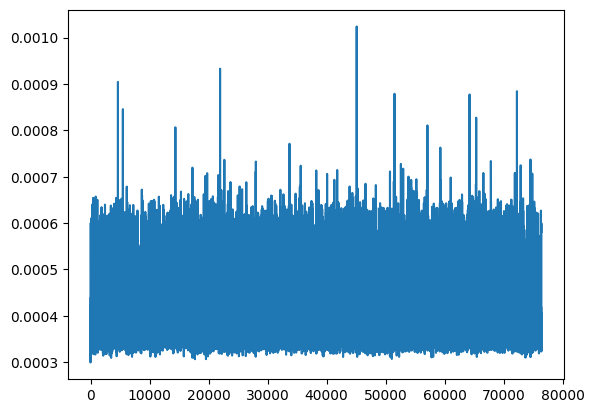

In [3]:
df['time_insert'].loc[2:].plot()

<Axes: >

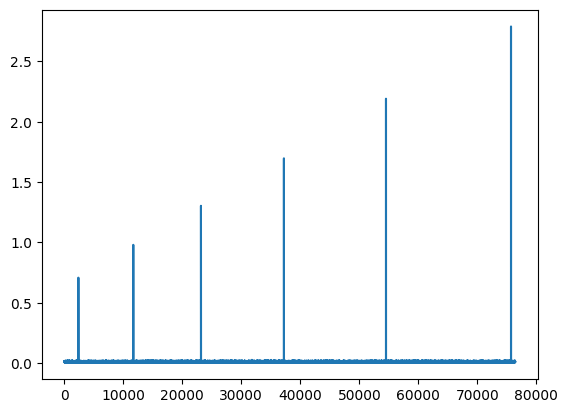

In [4]:
df['time_embed'].loc[2:].plot()

<Axes: >

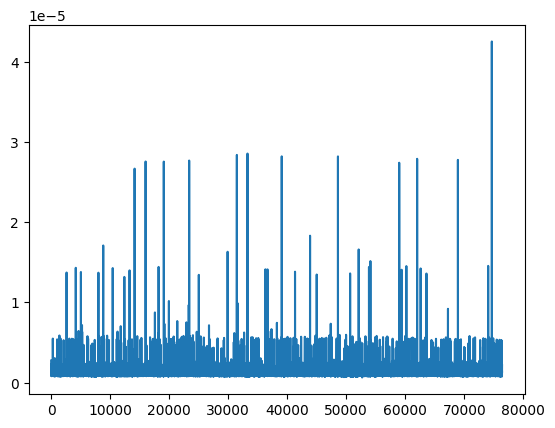

In [5]:
df['time_fetch'].loc[2:].plot()

In [6]:
df.sum(axis=1)[2:].mean()/16

0.0006452914644417643

In [7]:
from qdrant_client import QdrantClient
import os

In [8]:
client = QdrantClient(url="https://d6e75571-dd9e-4874-960f-5406b164b91a.ap-southeast-1-0.aws.cloud.qdrant.io", api_key=os.environ['QDRANT_CLOUD'],)
# client = QdrantClient(url="http://localhost:6333")

In [9]:
import joblib

In [10]:
all_points = joblib.load("all_points.pkl")

In [ ]:
all_points[0]

PointStruct(id='423671bd-1441-4abb-b7a5-e50cfaf365bb', vector={'dense': [0.2030223160982132, -0.21850869059562683, -0.21462476253509521, 0.8133427500724792, -0.7247297763824463, 0.024981185793876648, 0.07314871996641159, -0.06831832975149155, 0.4037798345088959, 0.22717320919036865, -0.7009923458099365, -0.4238189458847046, -0.5210083723068237, 0.12232347577810287, -0.013311407528817654, 0.6576810479164124, -0.25045299530029297, 0.1811830699443817, 0.5860439538955688, -0.07574595510959625, -0.6696114540100098, -0.3018859922885895, 0.06982553750276566, 0.3042539656162262, 0.4967462718486786, 0.9177026152610779, 0.693585991859436, 0.1438385546207428, 0.6079782843589783, 0.31878429651260376, 0.07131168991327286, 0.11076731234788895, -0.31633201241493225, -0.18888576328754425, -0.2895182967185974, -0.5666095614433289, -0.47781580686569214, 0.176372691988945, -0.08887501806020737, 0.47184619307518005, -0.018131468445062637, 0.3082885146141052, -0.3107181191444397, 0.6559393405914307, -1.385

In [ ]:
free_key = "ljjSchCiiadFS-WIJaly4sxvNdNyAADBxpu6ky4Z8C12wC2ulIWCzA"

In [ ]:
client.upload_points(
    collection_name="ondc-index",
    points=all_points,
    parallel=4,
    batch_size=300, 
)

In [ ]:
{
  "limit": 500,
  "filter": {"must":[{"key":"gender","match":{"value":"Men"}}]}
}

In [ ]:
import json
with open("key_preferences.json",'r') as f:
    p = json.load(f)

In [ ]:
p['indexed_cols']
p['numeric_cols']
x= set(p['indexed_cols']) - set(p['numeric_cols'])
x = x- set(['short_product_description','product_name'])


In [ ]:
from qdrant_client import QdrantClient,models
from tqdm import tqdm
for i in x:
    client.create_payload_index(
        collection_name="ondc-index",
        field_name=i,
        field_schema="keyword"
    )
# collection_name = "ondc-index"
# client.create_payload_index(
#     collection_name=f"{collection_name}",
#     field_name=f"field_name",
#     field_schema="keyword",
# )

In [ ]:
import pandas as pd
df = pd.read_json("time_stats.json")

In [ ]:
df.iloc[2:,:]['time_embed'].mean()

0.009914421416501404

In [ ]:
df = df /4

In [ ]:
import matplotlib.pyplot as plt
(df.iloc[2:,:]['time_embed'].clip(upper=0.3).sample(12000)*1000).plot(kind="kde",color="b")
plt.title("Embedding Time Distribution")
plt.xlabel("Time (ms)")

In [ ]:
import matplotlib.pyplot as plt
(df.iloc[2:,:]['time_insert'].clip(upper=0.3).sample(500)*1000).plot(kind="kde",color="b")
plt.title("Vector Database Insert Time Distribution")
plt.xlabel("Time (ms)")